In [1]:
import sys, importlib
# If running in VirtualBox image.
sys.path.append('/home/chihchiu/git/myawesomeproject')
# If running in Docker.
sys.path.append('/workspace/external/myawesomeproject')

from analysis.notebook import notebook_util as util
importlib.reload(util);
ac = util.CreateCollection();
util.ReloadAllModulesInCollection(ac)

In [2]:
import datetime
from analysis.trading.strategy import single_stock_simple_strategies
from analysis.trading import strategy_evaluation_lib

In [3]:
market = util.CreateMarket()
market_start = datetime.datetime(2014, 4, 1)
market_end = datetime.datetime(2017, 11, 1)

In [4]:
market.ListSymbols()

['AMZN', 'FB', 'TSLA', 'MSFT', 'SIVR', 'AAPL', 'GOOG']

In [5]:
# use_symbol='GOOG'
use_symbol='SIVR'

In [6]:
%%capture
no_action_strategy = single_stock_simple_strategies.BuyThenHoldStrategy(use_symbol)

fund = float(10000)
report = strategy_evaluation_lib.EvaluateStrategy(market, no_action_strategy, market_start, market_end, fund)
value_ts = report.GetTotalValueTimeseries()

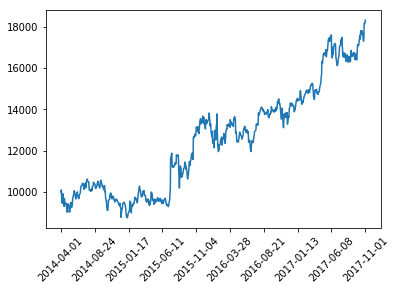

In [7]:
value_ts.Plot()

In [8]:
%%capture
random_action_strategy = single_stock_simple_strategies.RandomStrategy(use_symbol)

fund_random = float(10000)
report_random = strategy_evaluation_lib.EvaluateStrategy(market, random_action_strategy, market_start, market_end, fund_random)
value_ts_random = report_random.GetTotalValueTimeseries()

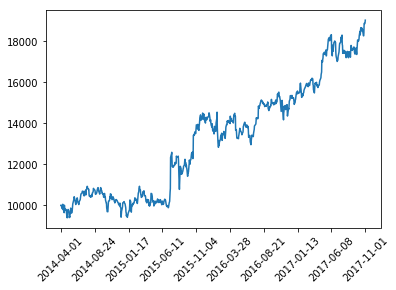

In [9]:
value_ts_random.Plot()

In [10]:
%%capture
strategy = single_stock_simple_strategies.PriceDerivativeWeekTraderStrategy(use_symbol)

fund = float(10000)
report = strategy_evaluation_lib.EvaluateStrategy(market, strategy, market_start, market_end, fund)
value_ts = report.GetTotalValueTimeseries()

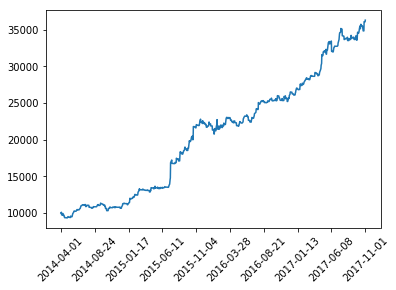

In [11]:
value_ts.Plot()

In [12]:
%%capture
detailed_report = report.GetDetailedReport()

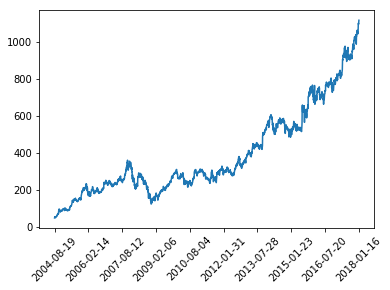

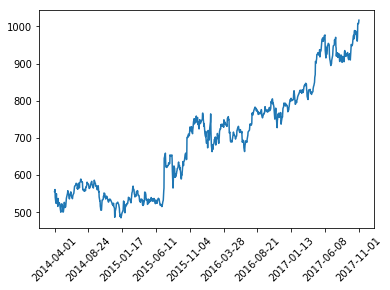

In [15]:
stock_timeseries = market.GetPriceTimeSeries(use_symbol)
stock_timeseries.Plot()
stock_timeseries.RestrictToRangeByDatetime(market_start, market_end).Plot()

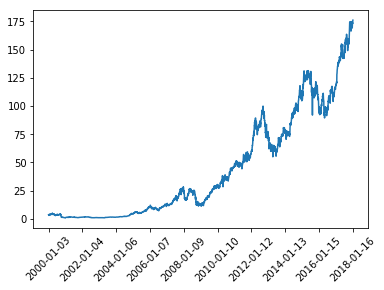

In [14]:
stock_timeseries = market.GetPriceTimeSeries('AAPL')
stock_timeseries.Plot()

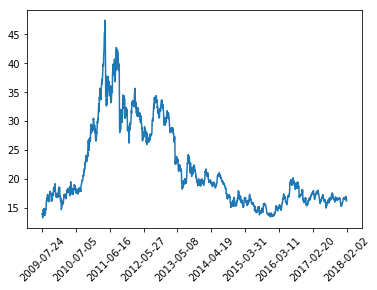

In [6]:
stock_timeseries = market.GetPriceTimeSeries('SIVR')
stock_timeseries.Plot()